Author: Tesfay Welegebreal Tesfay


# Data Science - Mini Project 1

### Autumn 2024

### AAU

NB: This code is written using Jupyter Notebook, not Google Colab. And the graph color on the report and on the output may not be the same. 

### Installation

In [7]:
!pip install beautifulsoup4
!pip install requests


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


### Importing important libraries

In [8]:
import requests
from bs4 import BeautifulSoup as bs

### Checking if I can connect to the website

In [9]:
r = requests.get("https://www.skinnytaste.com/recipe-index/?_paged=1")
if r.status_code == 200:
  print("Success")
else:
  print("Failure")

Success


### Scraping the data of the ﬁrst 50 pages and filtering interesting data

In [54]:
# URL of the page
food_name_list = []
food_image_list = []
food_calories_list = []
food_sammary_list =[]
recipe_points_list = []
recipe_key_list = []
# Adding the URL to each recipe, if the user wants to see more about the recipe by clicking the name 
# or image of the recipe in the user interaction part 
recipe_url_list = []

for i in range(1, 51):
  url = f'https://www.skinnytaste.com/recipe-index/?_paged={i}'
  # Get the page content
  response = requests.get(url)

  # Parse the content with BeautifulSoup
  soup = bs(response.text, 'html.parser')

  # Find the sections that contain the recipe data
  articles = soup.find_all('article')

#   I haven't understood why this has to be like that, but the for loop should start from 1, not 0.
#   I would like to hear why - it was pretty challenging for me :) 
  for i in range(1, len(articles)):
    points = articles[i].find('div', class_= 'wprm-ww-points')
    
    # Filtering the recipes by avoiding the blogs or articles in the pages
    if points:
      points = int(points.text.strip())
      recipe = articles[i].find('h2', class_ = 'entry-title')
      name = recipe.find('a').text.strip()
      recipe_url = recipe.find('a')['href']
      recipe_keys = articles[0].find('ul', class_ = 'cat-icons post-icons')
      keys = []
      if(recipe_keys):
        recipe_key = recipe_keys.find_all('li')
        for key in recipe_key:
          keys.append(key.text.strip())
      recipe_image = articles[i].find('img', class_='attachment-teaser size-teaser wp-post-image')['src']
      name = recipe.find('a').text.strip()
      recipe_soup = bs(requests.get(recipe_url).text, 'html.parser')
      recipe_cal = float(recipe_soup.find('span', class_= 'recipe-meta-value value-calories').text.replace('Cals:', '').strip())
      summary = recipe_soup.find('p').text.strip()
      food_name_list.append(name)
      food_image_list.append(recipe_image)
      food_calories_list.append(recipe_cal)
      food_sammary_list.append(summary)
      recipe_points_list.append(points)
      recipe_key_list.append(keys)
      recipe_url_list.append(recipe_url)

### Transforming the scraped data into DataFram

In [55]:
import pandas as pd

df = pd.DataFrame({'Name': food_name_list, 'Cal': food_calories_list,  'Points': recipe_points_list,
                   'Keys': recipe_key_list, 'Image': food_image_list, 'Summary': food_sammary_list, 'Url':recipe_url_list})


### Save the data as CSV file for future use

In [56]:
df.to_csv("recipe_data.csv", index=False)

### Preparing or reading the saved recipe data for use

In [57]:
data = pd.read_csv("recipe_data.csv")
df.shape

(938, 7)

### EDA and Visualisation

1.   Calories distribution
2.   Recipe key distribution
3.   Points distribution

### 1.   Calories distribution

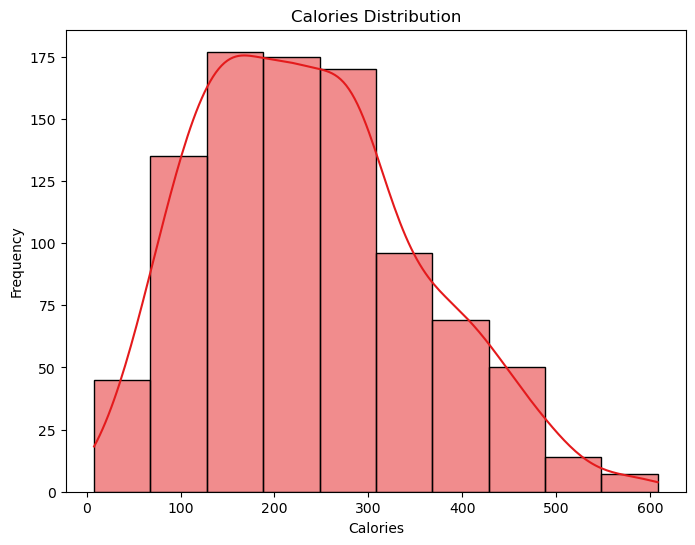

In [58]:
%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sns

sns.set_palette("Set1")

plt.figure(figsize=(8, 6))
# Replace the df['Cal'] by data['Cal'] to use from the CSV
sns.histplot(df['Cal'], bins=10, kde=True)
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


### 2.   Points Distribution

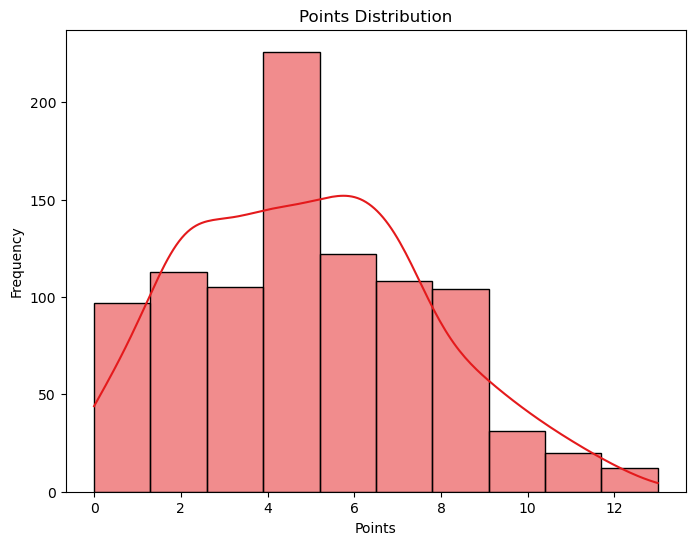

In [59]:
plt.figure(figsize=(8, 6))

# Replace the df['Points'] by data['Points'] to use from the CSV
sns.histplot(df['Points'], bins=10, kde=True)
plt.title('Points Distribution')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()


### 3.   Recipe Keys Distribution

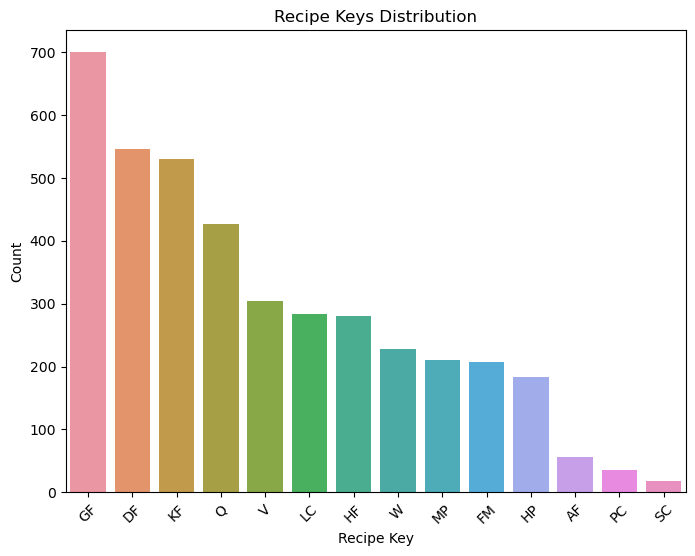

In [60]:
import numpy as np
import ast

# Step 1: Explode the recipe keys

# If Keys contains NaN, assign an empty list to ensure the explosion works without errors.
# Uncomment the line below to use from the CSV file
# data['new_keys'] = data['Keys'].map(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Replace the df.exploded['Keys'] by data.exploded['new_keys'] to use from the CSV
df_exploded = df.explode('Keys')

# Step 2: Count occurrences of each recipe key

# Replace the df_exploded['Keys'] by df_exploded['new_keys'] to use from the CSV
recipe_key_counts = df_exploded['Keys'].value_counts()

# Step 3: Visualize

plt.figure(figsize=(8, 6))
sns.barplot(x=recipe_key_counts.index, y=recipe_key_counts.values)
plt.title('Recipe Keys Distribution')
plt.xlabel('Recipe Key')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### User interaction

In [61]:
from IPython.display import Image, display, HTML

calorie_min = int(input("Enter minimum calorie value: "))
calorie_max = int(input("Enter maximum calorie value: "))
point_min = int(input("Enter minimum point value: "))
point_max = int(input("Enter maximum point value: "))

print("\n======================= RESULTS=========================\n")
# Filtering the DataFrame based on user input

# Replace the df[(, df['Cal'] and df['Points'] by data[(, data['Cal'] and data['Points'] respectively to use from the CSV
new_df = df[(df['Cal'] >= calorie_min) & (df['Cal'] <= calorie_max) &
                 (df['Points'] >= point_min) & (df['Points'] <= point_max)]

# Sorting by calories in a decending order
sorted_df = new_df.sort_values(by='Cal', ascending=False)

# Output the first 10 foods based on Calories
result = sorted_df.head(10)

# Checking if the search parameter doesn't hold true
if result.empty:
  print("Nothing to display :)")

else:
  def display_food_details(row):
      Keys = ', '.join(row['Keys'])
      html = f"""
      <div style="display: flex; align-items: center; margin-bottom: 20px;">
          <a href={row['Url']} target="_blank" rel="noopener noreferrer">
              <img src="{row['Image']}" alt="{row['Name']}" style="width: 200px; height: auto; margin-right: 20px;">
          </a>
          <div>
              <a href={row['Url']} target="_blank" rel="noopener noreferrer" style="text-decoration:none">
                  <h4 style="font-size:18px"> <strong>{row['Name']}</strong></h4><br>
              </a>
              <i><strong>Calories:</strong></i> {row['Cal']}<br>
              <i><strong>Points:</strong></i> {row['Points']}<br>
              <!-- Replace {Keys} by {row['Keys']} to use from CSV --> 
              <i><strong>Recipe Keys:</strong></i> {Keys}<br><br>
              <i><strong>Summary:</strong></i> {row['Summary']}<br>
          </div>
      </div>
      """
      display(HTML(html))

  # Display each food's details
  for index, row in result.iterrows():
      display_food_details(row)




Enter minimum calorie value: 1
Enter maximum calorie value: 1400
Enter minimum point value: 1
Enter maximum point value: 14

======================= RESULTS=========================

